# visualize_ModelResults

**Project:** Texas and Georgia Agriculture

**Date:** March 31, 2025

**Code Contact:** Kelechi Igwe, [igwekelechi.e@gmail.com]

**Inputs:** 
> - File path to Model_results_2.csv
> - File path to VIP_plot_df.csv
        
**Outputs:** PNG files showing visualizations of the variables in  the files mentioned above

**Description:** 

This script will read and visualize variables contained in the files mentioned. Please note that lines of codes that show title, legend and annotations are commented out to enable the team make them seperate and editable in presentations


In [11]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sys
import matplotlib.patches as patches
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


## Plot r-squared values of model with and without RS variables

In [2]:
# Specify path to file
df = pd.read_csv(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\Model_results_2.csv", delimiter = ',', encoding = 'latin1')

In [3]:
# Rename the columns in the file in the order they appear
df.columns = ["Quality Metric", "Adj R² (No RS Observations)", "Adj R² (With RS Observations)", "Increase in Variation Explained (%)"]

In [4]:
# View the dataframe
df

,Quality Metric,Adj R² (No RS Observations),Adj R² (With RS Observations),Increase in Variation Explained (%)
0,Fiber Strength,36.9,54.4,17.5
1,Fiber Length,15.5,51.2,35.7
2,Micronaire,57.7,72.5,14.8
3,Length Uniformity,0.0,41.4,41.4
4,Trash Surface Area,26.6,63.5,36.9
5,Color Reflectance,18.6,60.2,41.6
6,Color Yellowness,38.1,31.6,-6.5


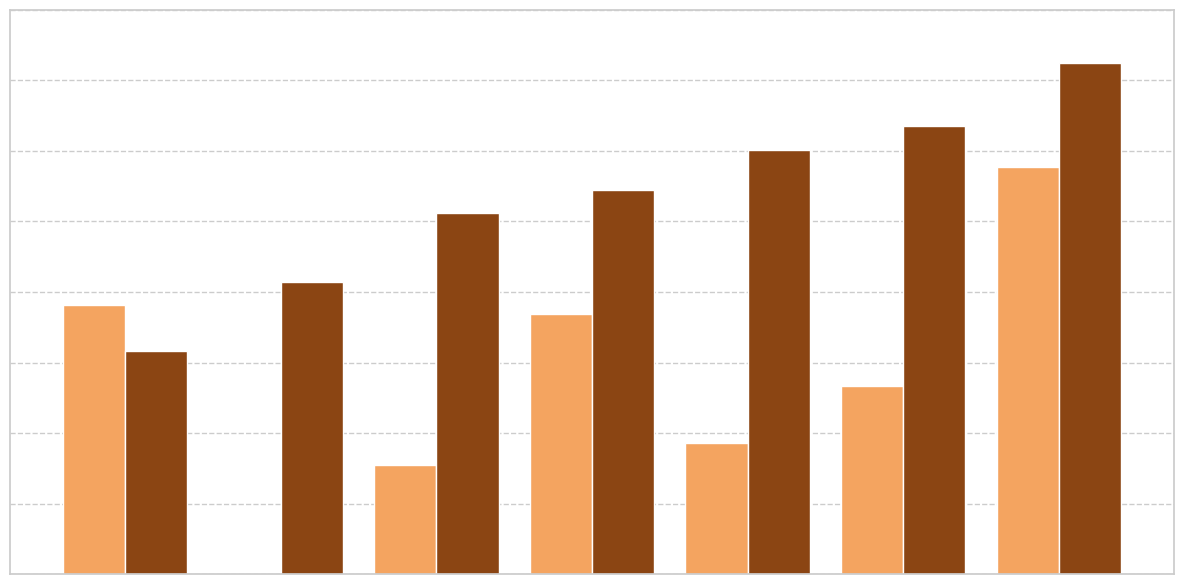

In [12]:
# Sort DataFrame by "Adj R² (With RS Observations)" in ascending order
df = df.sort_values(by="Adj R² (With RS Observations)", ascending=True)

# Set plot style
sns.set_theme(style="whitegrid")

# Define figure size
plt.figure(figsize=(12, 6))

# Create bar width and positions
x_labels = df["Quality Metric"]
x = range(len(x_labels))
bar_width = 0.4

# Plot bars
plt.bar(x, df["Adj R² (No RS Observations)"], width=bar_width, label=" ", color="sandybrown")
plt.bar([p + bar_width for p in x], df["Adj R² (With RS Observations)"], width=bar_width, label=" ", color="saddlebrown")

# Annotate Increase in Percent of Variation Explained on top of 'With RS Observations' bars
#for i, (x_pos, value) in enumerate(zip(x, df["Adj R² (With RS Observations)"])):
#    plt.text(x_pos + bar_width, value + 1, f"+{df["Increase in Variation Explained (%)"][i]}%", ha='center', fontsize=10, color='black')

# Remove grid lines
#plt.grid(True, linestyle ='--')

# Formatting
plt.xticks([])#p + bar_width / 2 for p in x], x_labels, rotation=45, ha='right')
plt.yticks(ticks=plt.yticks()[0], labels=[])#ticks=None, labels=None, minor=False)
plt.xlabel("")#Quality Metric")
#plt.ylabel("")#Adjusted R² (%)")
plt.grid(True, linestyle ='--')
plt.title("")
#plt.legend(loc="upper left", frameon=False)

# Save image
#plt.savefig('Model performance metrics_no_texts.png',dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

## Plot most influential variables

In [7]:
# Specify path to file
vip_df = pd.read_csv(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\Master_dfs\VIP_plot_df.csv", delimiter = ',')
vip_df


,Indicator,Month,Variable,Correlation
0,Length,7,GDD,0.58
1,Reflectance,8,EVI,0.55
2,Yellowness,8,Precip,-0.68
3,Strength,8,RZSM,-0.56
4,Uniformity,8,RZSM,-0.54
5,Micronaire,9,GDD,0.54
6,Trash,10,Precip,0.60
7,Reflectance,10,Precip,-0.54
8,Strength,10,RZSM,-0.51
9,Trash,11,RZSM,0.60


In [8]:
vip_df.columns

Index(['Indicator', 'Month', 'Variable', 'Correlation'], dtype='object')

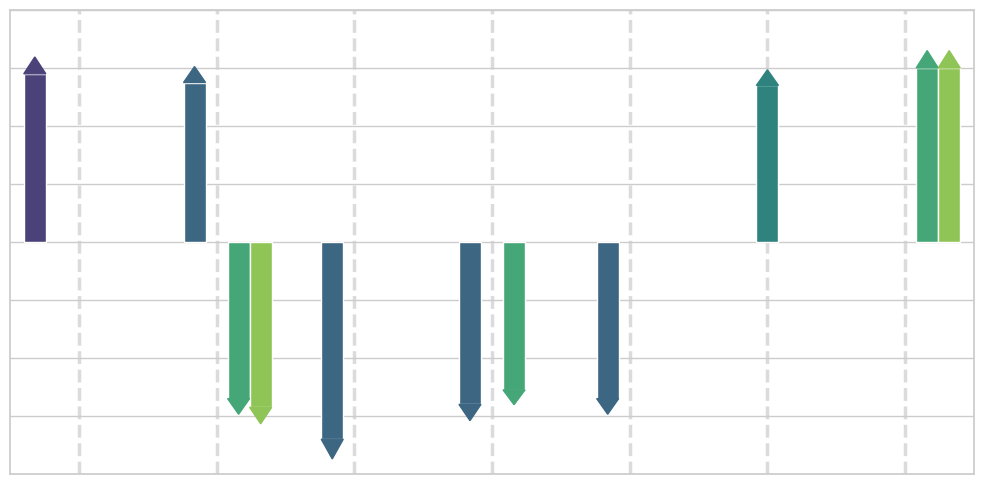

In [13]:

# Create the grouped bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Indicator', y='Correlation', data=vip_df, hue='Month', errorbar=None, 
                 palette=sns.color_palette("viridis", n_colors=len(vip_df['Month'].unique())))

# Iterate through bars and overlay triangle arrowheads
for bars, month in zip(ax.containers, vip_df['Month'].unique()):
    for bar in bars:
        x_center = bar.get_x() + bar.get_width() / 2  # Center of the bar
        width = bar.get_width() * 0.8  # Make the arrow narrower than the bar
        height = bar.get_height()
        
        if height >= 0:  # For positive bars
            arrow_tip = (x_center, height + height * 0.1)  # Arrow tip above the bar
            left_base = (bar.get_x(), height)  # Left base of triangle
            right_base = (bar.get_x() + bar.get_width(), height)  # Right base of triangle
        else:  # For negative bars
            arrow_tip = (x_center, height - abs(height) * 0.1)  # Arrow tip below the bar
            left_base = (bar.get_x(), height)  
            right_base = (bar.get_x() + bar.get_width(), height)

        # Create a triangular patch (arrowhead)
        triangle = patches.Polygon([left_base, arrow_tip, right_base], closed=True, color=bar.get_facecolor())
        ax.add_patch(triangle)  # Add triangle to the plot


# Add the variable names of each predictor to the plot
'''
for bars, month in zip(ax.containers, vip_df['Month'].unique()):
    for bar, var in zip(bars, vip_df[vip_df['Month'] == month]['Variable']):
        height = bar.get_height()
        offset = 8 if height >= 0 else -35
        ax.annotate(var,  # Directly use the string from the "Variable" column
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, offset),  # Offset slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black', rotation=50)
'''

# Set plot aesthetics
ax.set_xticks(ax.get_xticks())  
ax.grid(axis= 'x', linestyle='--', linewidth=2.5, alpha=0.7)  # Dashed vertical and horizontal grid lines

# remove legend
ax.legend().remove()

#plt.xticks(rotation=45, ha='right')
plt.xlabel("")#Quality Metric")
plt.ylabel("")#Quality Metric")
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.yticks(ticks=plt.yticks()[0], labels=[])
plt.tight_layout()
#plt.legend(loc="lower left", frameon=False, labels=[' ', ' ', ' ', ' ', ' '])

# Save image
#plt.savefig('Model_VIPs_no_texts_no_legend.png',dpi=200, bbox_inches='tight')

plt.show()


## Visualize Cotton Quality metrics by districts

In [12]:
# Import CSV of input variables
df = pd.read_csv(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\Master_dfs\Master_df_TX.csv", delimiter = ',')
df_ga = pd.read_csv(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\Master_dfs\Master_df_GA.csv", delimiter = ',')


# Import study area shapefiles
georgia = gpd.read_file(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\NASS_Districts_Shapefiles\georgia_NASS_districts.shp")
texas = gpd.read_file(r"C:\Users\kelechi\OneDrive - Kansas State University\Desktop\Research Resources\Conferences\NASA_DEVELOP\Data\NASS_Districts_Shapefiles\texas_NASS_districts.shp")

texas.head()


,NASS,Shape_Leng,Shape_Area,geometry
0,12,10.373734,3.858897,"POLYGON ((-102.22181 34.3133, -102.19932 34.31..."
1,21,13.807910,3.495432,"POLYGON ((-100.41529 35.61986, -100.41342 35.6..."
2,22,10.891951,2.843278,"POLYGON ((-99.92759 33.83595, -99.92728 33.835..."
3,60,18.055064,8.672878,"POLYGON ((-102.89755 32.08718, -102.87545 32.0..."
4,70,16.623285,8.464564,"POLYGON ((-101.21858 32.08731, -101.21854 32.0..."


In [179]:
df.head()

,Year,NASS_District,n_bales,Avg_Mike,Avg_Strength,Avg_HVI_RD,Avg_HVI_b,Avg_Trash_Percent,Avg_Length,Avg_Uniformity,...,SPI_9,SPI_10,SPI_11,EVI_5,EVI_6,EVI_7,EVI_8,EVI_9,EVI_10,EVI_11
0,2015,TX_12,3224928,4.125,30.642,76.504,8.700,42.307,1.108,80.371,...,-0.7449,1.3263,0.5623,0.140593,0.174372,0.310351,0.326263,0.324001,0.217637,0.151869
1,2015,TX_21,347970,4.111,30.990,76.726,8.507,40.451,1.113,80.545,...,-1.0295,0.4366,0.7987,0.176564,0.208896,0.260007,0.326887,0.355166,0.309296,0.335578
2,2015,TX_22,451723,4.466,29.693,74.584,9.240,35.471,1.080,79.994,...,-1.2193,0.4463,0.9010,0.246605,0.197423,0.213300,0.245404,0.289779,0.265812,0.252442
3,2015,TX_70,113943,4.427,30.066,75.600,9.103,36.278,1.084,80.008,...,-1.1997,0.7360,0.7900,0.164133,0.202814,0.271417,0.277810,0.230527,0.212131,0.146137
4,2016,TX_12,3745740,4.295,29.938,77.869,8.403,32.212,1.131,80.778,...,1.2362,-0.4261,1.1407,0.142480,0.178939,0.270039,0.315751,0.334655,0.302762,0.199100


In [180]:
df['NASS_District'].unique()

array(['TX_12', 'TX_21', 'TX_22', 'TX_70'], dtype=object)

In [181]:
df['NASS_District_num'] = df['NASS_District'].str.split('_').str[1].astype(int)
df_ga['NASS_District_num'] = df_ga['NASS_District'].str.split('_').str[1].astype(int)

In [182]:
texas['NASS'].unique()

array([12, 21, 22, 60, 70], dtype=int64)

In [183]:
# Merge dataframes on the common column
texas_df = texas.merge(df, left_on='NASS', right_on='NASS_District_num', how='left')

# Merge dataframes on the common column
georgia_df = georgia.merge(df_ga, left_on='NASS', right_on='NASS_District_num', how='left')

georgia_df.head()

,NASS,Shape_Leng,Shape_Area,geometry,Year,NASS_District,n_bales,Avg_Mike,Avg_Strength,Avg_HVI_RD,...,SPI_10,SPI_11,EVI_5,EVI_6,EVI_7,EVI_8,EVI_9,EVI_10,EVI_11,NASS_District_num
0,70,6.595045,1.682641,"POLYGON ((-84.62492 32.23311, -84.62432 32.232...",2015.0,GA_70,610768.0,4.671,29.192,71.796,...,-0.3038,1.3323,0.31,0.38,0.60,0.67,0.55,0.34,0.26,70.0
1,70,6.595045,1.682641,"POLYGON ((-84.62492 32.23311, -84.62432 32.232...",2016.0,GA_70,613778.0,4.578,29.820,78.978,...,-1.9859,-1.9298,0.29,0.43,0.59,0.62,0.57,0.42,0.28,70.0
2,70,6.595045,1.682641,"POLYGON ((-84.62492 32.23311, -84.62432 32.232...",2017.0,GA_70,594819.0,4.366,29.535,78.241,...,-0.0985,-1.5128,0.36,0.44,0.64,0.73,0.64,0.40,0.29,70.0
3,70,6.595045,1.682641,"POLYGON ((-84.62492 32.23311, -84.62432 32.232...",2018.0,GA_70,368888.0,4.275,29.139,73.664,...,1.4167,1.2902,0.39,0.51,0.66,0.76,0.71,0.47,0.35,70.0
4,70,6.595045,1.682641,"POLYGON ((-84.62492 32.23311, -84.62432 32.232...",2019.0,GA_70,760509.0,4.519,30.432,74.887,...,0.4964,0.2553,0.37,0.51,0.69,0.71,0.66,0.42,0.31,70.0


In [184]:
georgia_df.shape

(21, 54)

In [172]:
df.shape

(40, 50)

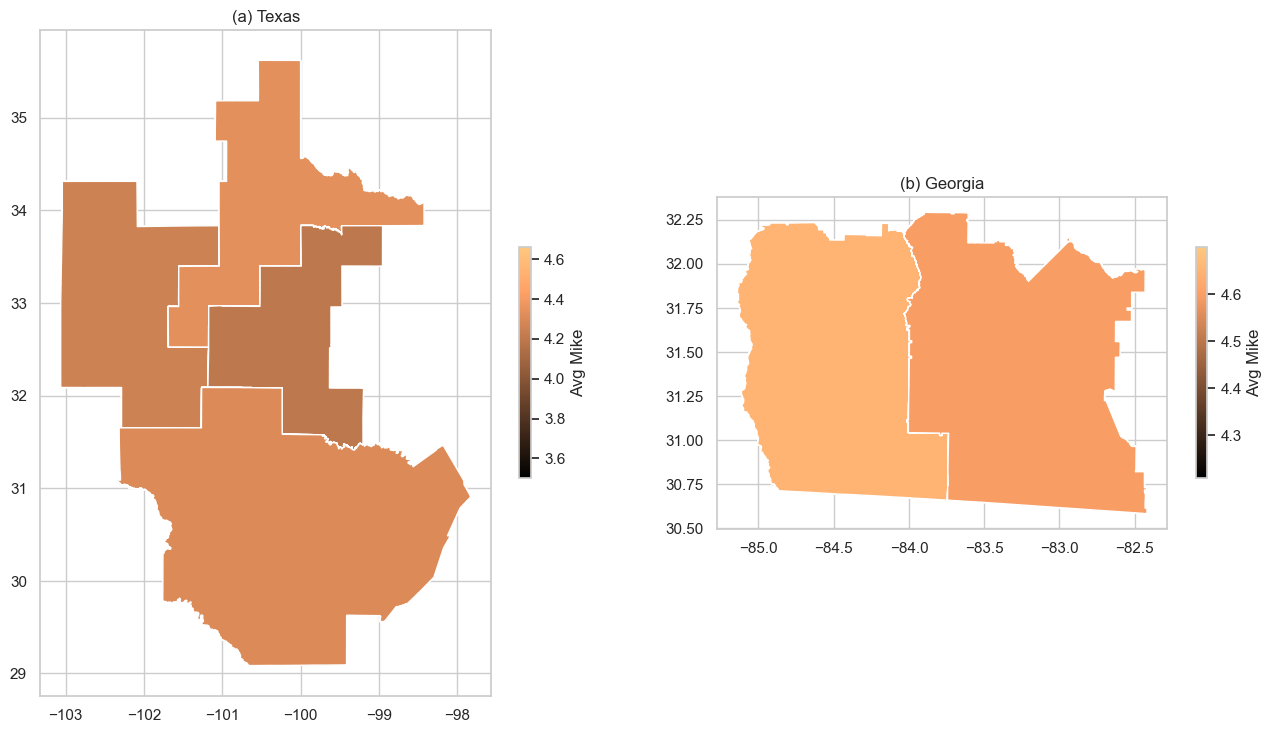

In [188]:
# Plot the original and predicted irrigation amount
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Original 'irr_amount (mm)'
texas_df.plot(column='Avg_Mike', cmap='copper', legend=True, ax=axes[0], legend_kwds={'shrink': 0.3, 'label': 'Avg Mike'})
axes[0].set_title('(a) Texas')
#plt.savefig('tx_mike.jpg', format='jpeg', dpi=300, bbox_inches='tight')

# Predicted 'irr_amount (mm)'
georgia_df.plot(column='Avg_Mike', cmap='copper', legend=True, ax=axes[1], legend_kwds={'shrink': 0.3, 'label': 'Avg Mike'})
axes[1].set_title('(b) Georgia')

plt.show()